In [89]:
import pandas as pd
import ast  # Para analizar la cadena como un literal de Python
from pandas import json_normalize
import gzip 
from ast import literal_eval
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
user_reviews_gz= ("user_reviews.json.gz")
filas=[]
with gzip.open(user_reviews_gz, 'rt', encoding='MacRoman') as archivo:
    for line in archivo.readlines():
        filas.append(ast.literal_eval(line))

user_review = pd.DataFrame(filas)

In [69]:
user_review.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [70]:
user_review = user_review.drop('user_url', axis=1)

In [71]:
user_review.head()

,user_id,reviews
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,"[{'funny': '3 people found this review funny',..."


In [72]:
user_review_explode = user_review.explode('reviews')

In [73]:
user_review_explode

,user_id,reviews
0,76561197970982479,"{'funny': '', 'posted': 'Posted November 5, 20..."
0,76561197970982479,"{'funny': '', 'posted': 'Posted July 15, 2011...."
0,76561197970982479,"{'funny': '', 'posted': 'Posted April 21, 2011..."
1,js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
1,js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...
25797,76561198312638244,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
25797,76561198312638244,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
25798,LydiaMorley,"{'funny': '1 person found this review funny', ..."
25798,LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [74]:
print(user_review_explode.index.duplicated().any())

True


In [75]:
df = user_review_explode.reset_index(drop=True)

In [77]:
df

,user_id,reviews
0,76561197970982479,"{'funny': '', 'posted': 'Posted November 5, 20..."
1,76561197970982479,"{'funny': '', 'posted': 'Posted July 15, 2011...."
2,76561197970982479,"{'funny': '', 'posted': 'Posted April 21, 2011..."
3,js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
4,js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...
59328,76561198312638244,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
59329,76561198312638244,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
59330,LydiaMorley,"{'funny': '1 person found this review funny', ..."
59331,LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [78]:
df_normalized = pd.json_normalize(df['reviews'])
df_result = pd.concat([df, df_normalized], axis=1).drop('reviews', axis=1)

In [79]:
df_result

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59328,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [80]:
columnas_necesarias = ['user_id', 'item_id', 'recommend', 'review']
df2 = df_result[columnas_necesarias]
df2

,user_id,item_id,recommend,review
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,22200,True,It's unique and worth a playthrough.
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610,True,I know what you think when you see this title ...
4,js41637,227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...
59328,76561198312638244,70,True,a must have classic from steam definitely wort...
59329,76561198312638244,362890,True,this game is a perfect remake of the original ...
59330,LydiaMorley,273110,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,730,True,:D


In [84]:
df2.to_csv('df_user_reviews.csv', index=False)

In [85]:
nltk.download('vader_lexicon')
model_sentimiento = SentimentIntensityAnalyzer()
def analizador(review):
# Obtener el puntaje de sentimiento usando SentimentIntensityAnalyzer 
    sentimiento_score = model_sentimiento.polarity_scores(review)
# Clasifico el sentimiento
    if review and not pd.isnull(review): 
        if sentimiento_score['compound'] >= 0.5: 
            return 2 # Sentimiento positivo 
        elif sentimiento_score['compound'] <= -0.5: return 0 # Sentimiento negativo

        else: 
            return 1 # Sentimiento neutral
    else:
        return 1

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Transtermo\AppData\Roaming\nltk_data...


In [86]:
df2['review'].fillna('',inplace=True)

C:\Users\Transtermo\AppData\Local\Temp\ipykernel_13112\2305741545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review'].fillna('',inplace=True)


In [87]:
df2['sentiment_analiysis'] = df2['review'].apply(analizador)
df2.drop(columns='review',inplace=True)

C:\Users\Transtermo\AppData\Local\Temp\ipykernel_13112\2236639571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment_analiysis'] = df2['review'].apply(analizador)
C:\Users\Transtermo\AppData\Local\Temp\ipykernel_13112\2236639571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='review',inplace=True)


In [88]:
df2

,user_id,item_id,recommend,sentiment_analiysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,1
2,76561197970982479,43110,True,2
3,js41637,251610,True,2
4,js41637,227300,True,2
...,...,...,...,...
59328,76561198312638244,70,True,2
59329,76561198312638244,362890,True,2
59330,LydiaMorley,273110,True,2
59331,LydiaMorley,730,True,2


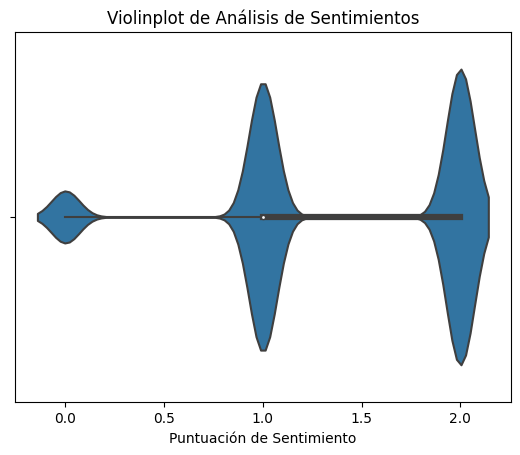

In [92]:
sns.violinplot(x='sentiment_analiysis', data=df2) 
plt.title('Violinplot de Análisis de Sentimientos') 
plt.xlabel('Puntuación de Sentimiento')
plt.show()

In [93]:
df2.dropna(inplace=True)

C:\Users\Transtermo\AppData\Local\Temp\ipykernel_13112\1761232742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [94]:
df2

,user_id,item_id,recommend,sentiment_analiysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,1
2,76561197970982479,43110,True,2
3,js41637,251610,True,2
4,js41637,227300,True,2
...,...,...,...,...
59328,76561198312638244,70,True,2
59329,76561198312638244,362890,True,2
59330,LydiaMorley,273110,True,2
59331,LydiaMorley,730,True,2


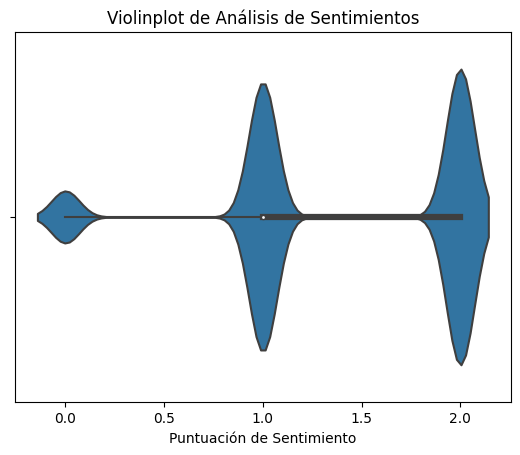

In [95]:
sns.violinplot(x='sentiment_analiysis', data=df2) 
plt.title('Violinplot de Análisis de Sentimientos') 
plt.xlabel('Puntuación de Sentimiento')
plt.show()

In [96]:
df2.to_csv('df_user_reviews.csv', index=False)